In [71]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import numpy as np

In [72]:
import tensorflow_datasets as tfds

In [73]:
data,info = tfds.load('cassava', split='train+test', shuffle_files=True, with_info=True,as_supervised=True)

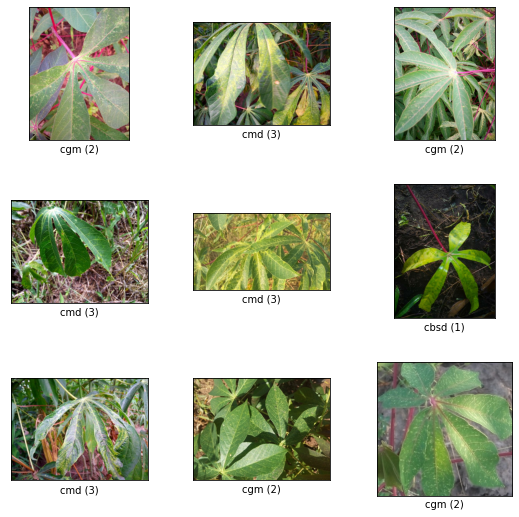

In [74]:
vis = tfds.visualization.show_examples(data,info)

In [75]:
def resize(image,label):
  image = tf.image.resize(image,[224,224])
  return (image,label)

data = data.map(resize)

In [76]:
data = data.map(lambda x,y: (x / 255,y))

In [77]:
data = data.shuffle(len(data))

In [78]:
data = data.batch(32)

In [79]:
def one_hot(image, label):
    label = tf.one_hot(tf.cast(label, tf.int32), 3)
    # Recasts it to Float32
    label = tf.cast(label, tf.float32)
    return image, label

data = data.map(one_hot)

In [83]:
my_model = tf.keras.models.Sequential(layers = [
                                     tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape=(224,224,3)),
                                     tf.keras.layers.MaxPool2D(),
                                     tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPool2D((4,4)),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.BatchNormalization(),
                                     tf.keras.layers.Dense(256,activation='relu'),
                                     tf.keras.layers.Dense(3,activation='softmax')
],
name='ConvModel')

# Using the Categorical loss, and ADAM Optimizer
my_model.compile(
    'adam',
    'categorical_crossentropy',
    ['accuracy']
)

In [ ]:
History = my_model.fit(data,epochs=10)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
alpha = plt.plot(History.history['accuracy'])

Epoch 1/10
 19/236 [=>............................] - ETA: 8:04 - loss: 1.2974 - accuracy: 0.3339